In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Project_big_data/data'

/content/gdrive/MyDrive/Colab Notebooks/Project_big_data/data


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('training_data.csv')

<ipython-input-4-b2bc08d65b17>:1: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('training_data.csv')


In [5]:
df

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,Standard,6,Direct Billed to Insured,Pre-paid,N,42851,35,1999,PONT GR PRIX GT,...,NaN,2006,Y,Y,162.55,0,0.0,0.0,0.0,0.0
424427,381735600,Standard,6,Direct Billed to Insured,Pre-paid,N,43669,31,2000,NSSN QUEST,...,100-200,2006,Y,Y,117.13,0,0.0,0.0,0.0,0.0
424428,382057400,Standard,6,Direct Billed to Insured,Installment,N,42487,35,1997,PONT TRANSSPORT,...,100-400,2006,N,Y,118.21,0,0.0,0.0,0.0,0.0
424429,382162500,Preferred,6,Direct Billed to Insured,Installment,N,43360,31,1998,PONT SUNFIRE SE,...,40-100,2006,N,Y,103.93,0,0.0,0.0,0.0,0.0


In [6]:
print(df.shape)

(424431, 69)


In [7]:
df= df.drop_duplicates()

In [8]:
print(df.shape)

(424431, 69)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [11]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [12]:
num_columns = df.select_dtypes(['int64','float64']).columns
df_num = df[num_columns]

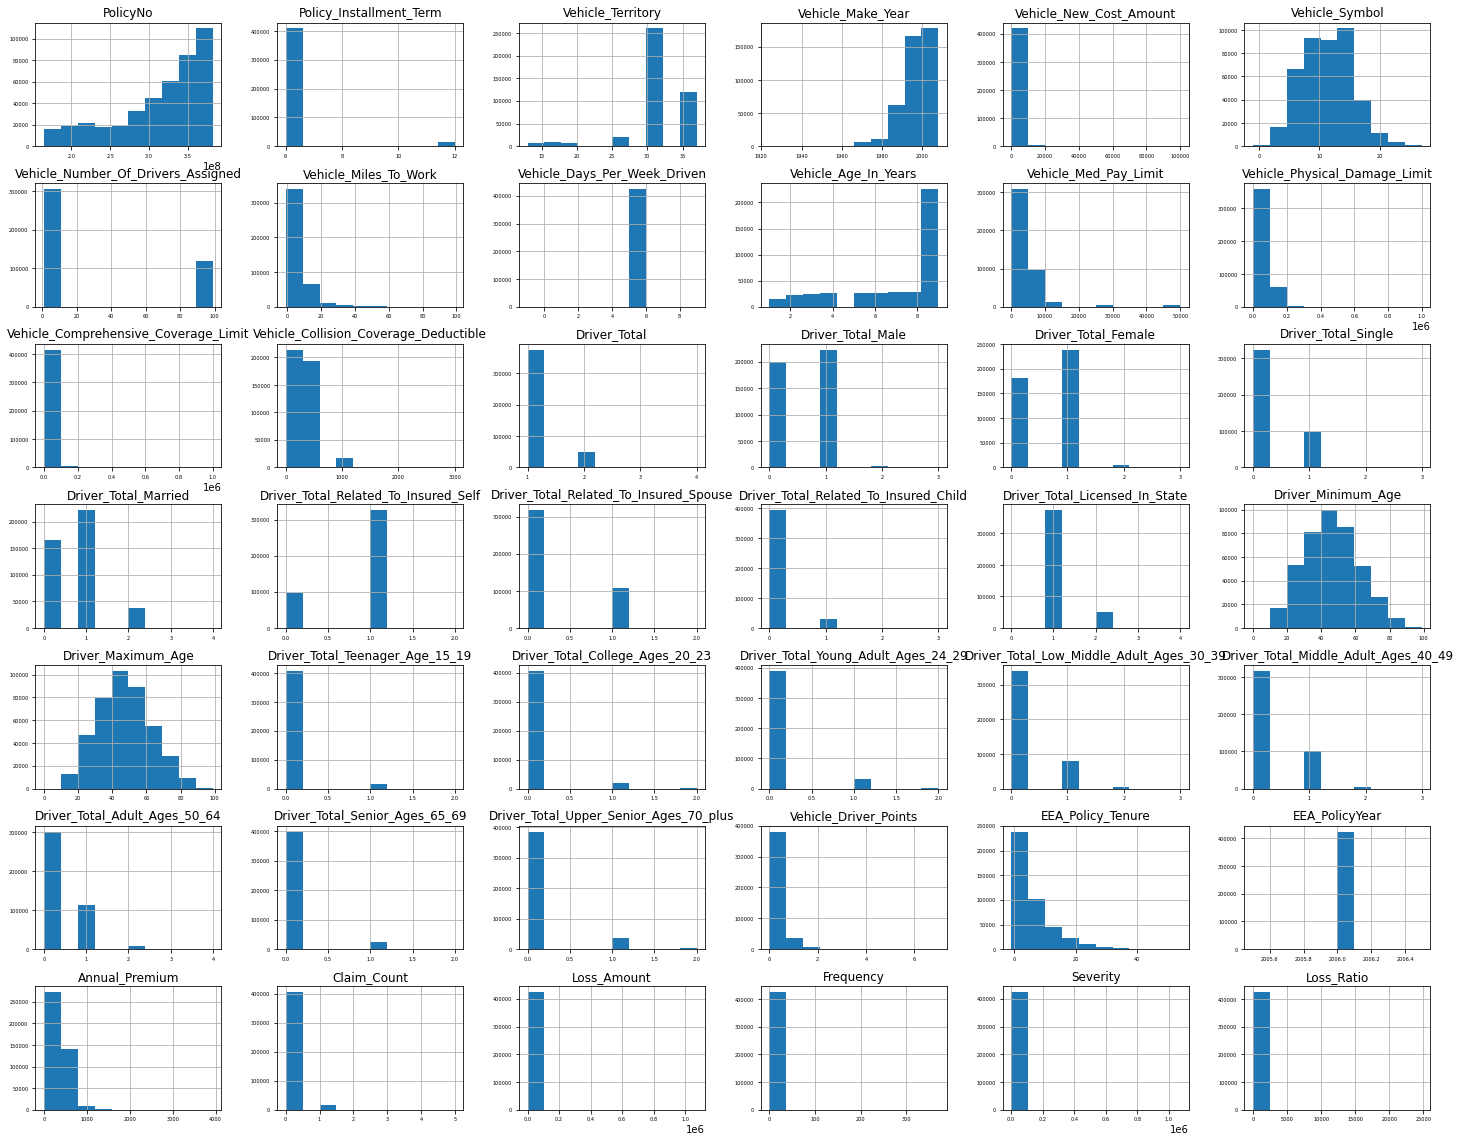

In [13]:
df_num.hist(figsize=(25, 20), bins=10, xlabelsize=5, ylabelsize=5);

In [14]:
# Find columns with null values
missing_columns = df.columns[df.isnull().any()]
print("Columns with null values:")
print(missing_columns)

Columns with null values:
Index(['Vehicle_Bodily_Injury_Limit', 'EEA_Prior_Bodily_Injury_Limit'], dtype='object')


In [15]:
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
print(missing_cols)

Vehicle_Bodily_Injury_Limit      17326
EEA_Prior_Bodily_Injury_Limit    17326
dtype: int64


In [16]:
# # strip extra spaces from column values
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'Vehicle_Bodily_Injury_Limit' column with the mode
mode_value = df['Vehicle_Bodily_Injury_Limit'].mode()[0]
df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in 'Vehicle_Bodily _Injury_Limit' column
print(df['Vehicle_Bodily_Injury_Limit'])

0         250-500
1         100-300
2         250-500
3          50-100
4          50-100
           ...   
424426      25-50
424427    100-300
424428    250-500
424429     50-100
424430      25-50
Name: Vehicle_Bodily_Injury_Limit, Length: 424431, dtype: object


In [17]:
# strip extra spaces from column values
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].str.strip()

#Replace any null or missing values in the 'EEA_Prior_Bodily_Injury_Limit' column with the mode
mode_value = df['EEA_Prior_Bodily_Injury_Limit'].mode()[0]
df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(mode_value)

# Check unique values in the 'EEA_Prior_Bodily_Injury_Limit' column
print(df['EEA_Prior_Bodily_Injury_Limit'])

0         100-400
1         100-200
2         100-400
3          40-100
4          40-100
           ...   
424426      20-50
424427    100-200
424428    100-400
424429     40-100
424430      20-50
Name: EEA_Prior_Bodily_Injury_Limit, Length: 424431, dtype: object


In [18]:
df['Vehicle_Number_Of_Drivers_Assigned'].value_counts()

1     295837
99    118544
2       9283
3        666
4         74
5         18
6          6
8          2
7          1
Name: Vehicle_Number_Of_Drivers_Assigned, dtype: int64

In [19]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
# Calculate the correlation matrix using the corr() method of the DataFrame
corr_matrix =df.corr()

<ipython-input-22-1bb0c5170461>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  create_mask = np.zeros_like(corr_matrix, dtype=np.bool)


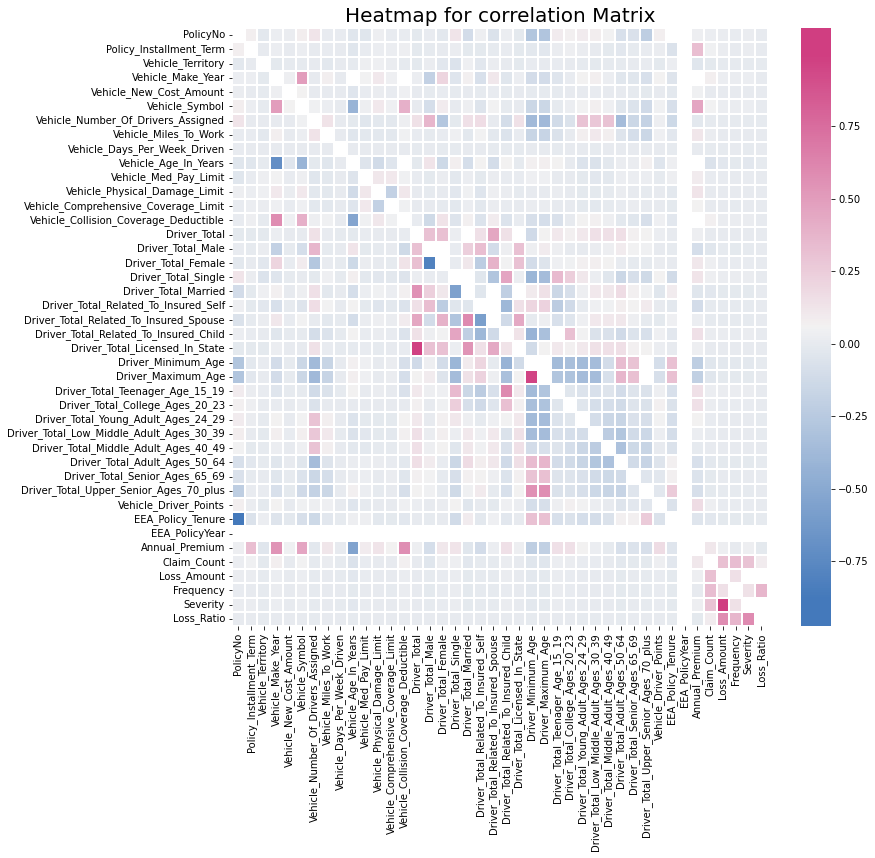

In [22]:
# Create a new figure with a specified size and add a title to the plot
fig, axis = plt.subplots(figsize=(12, 11))
plt.title("Heatmap for correlation Matrix", fontsize=20)


# Create a mask for significant values in the correlation matrix
create_mask = np.zeros_like(corr_matrix, dtype=np.bool)
create_mask[np.triu_indices_from(create_mask)] = True
create_mask[np.abs(corr_matrix) < 0.5] = False


# Create a custom color map using seaborn's diverging_palette() function
custom_map = sns.diverging_palette(250, 349, as_cmap=True)


# Use seaborn's heatmap() function to create the heatmap of the correlation matrix
sns.heatmap(corr_matrix, ax=axis, cmap=custom_map, mask=create_mask, linewidths=0.1, cbar_kws={"extend":"both", "extendfrac":0.05,"extendrect": True})


# Display the plot using matplotlib's show() method
plt.show()

In [23]:
from prettytable import PrettyTable

# Compute the correlation between the numeric features and the target variable 'Loss_Ratio'
df_num_correlation = df_num.corr()['Loss_Ratio'][:-1] # 1 because the latest row is Loss_Ratio

# Identify the numeric features that are strongly correlated with 'Loss_Ratio'
list_of_feature = df_num_correlation[abs(df_num_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Loss Ratio:\n{}".format(len(list_of_feature), list_of_feature))

# Compute the correlation between each individual numeric feature and ‘Loss_Ratio'
list_seperate_feature = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is Loss_Ratio
    # Create a DataFrame with the current feature and 'Loss_Ratio'
    df_new = df_num[[df_num.columns[i], 'Loss_Ratio']]
    # Remove any rows where the current feature has a value of 0
    df_new = df_new[df_new[df_num.columns[i]] != 0]
    # Add the DataFrame to a list of all individual feature correlations
    list_seperate_feature.append(df_new)

# Sort the list of individual feature correlations by correlation coefficient
correlated_features = {feature.columns[0]: feature.corr()['Loss_Ratio'][0] for feature in list_seperate_feature}
correlated_features = sorted(correlated_features.items(), key=lambda x: x[1])

# Create a table with the correlations for each individual numeric feature
pre_table = PrettyTable()
pre_table.field_names = ["Feature", "Correlation"]

for (key, value) in correlated_features:
    pre_table.add_row([key, value])

# Print the table
print(pre_table)


There are 2 strongly correlated values with Loss Ratio:
Severity       0.585348
Loss_Amount    0.578532
Name: Loss_Ratio, dtype: float64
+------------------------------------------+-------------------------+
|                 Feature                  |       Correlation       |
+------------------------------------------+-------------------------+
|              Annual_Premium              |  -0.013339920079666993  |
|   Driver_Total_Young_Adult_Ages_24_29    |  -0.007484243417789255  |
|               Claim_Count                |  -0.0061785537458779165 |
|            Vehicle_Territory             |  -0.0033056865820963754 |
|     Driver_Total_College_Ages_20_23      |  -0.002939781747480398  |
|     Driver_Total_Teenager_Age_15_19      |  -0.0026084656152449985 |
|    Vehicle_Number_Of_Drivers_Assigned    |  -0.002467253158321577  |
|  Driver_Total_Related_To_Insured_Child   |  -0.0022147828417857503 |
|            EEA_Policy_Tenure             |  -0.002064310615584465  |
|          

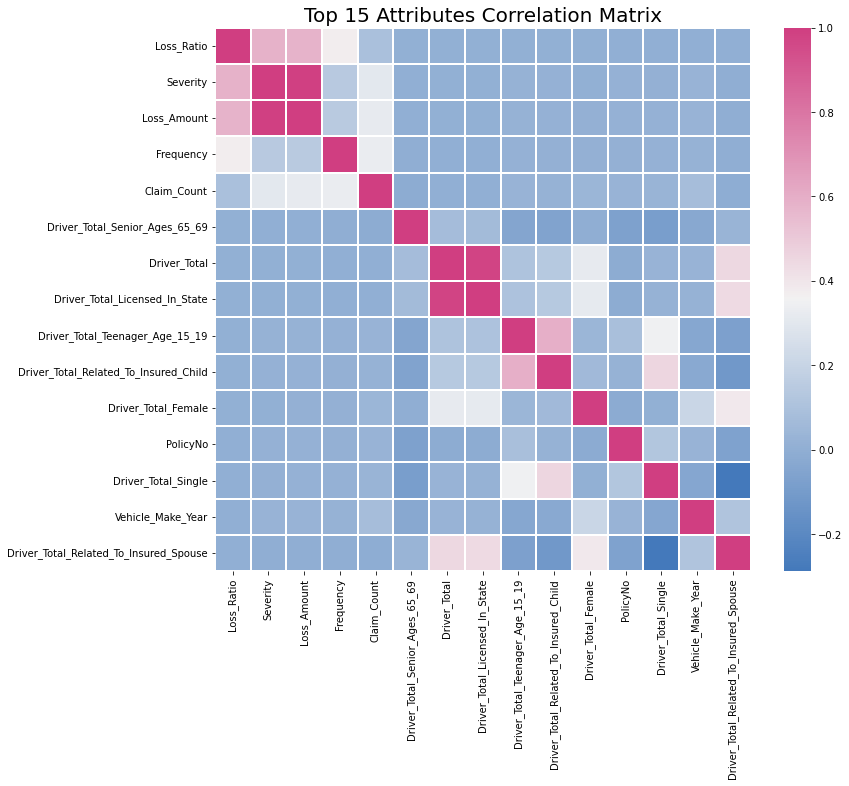

In [24]:
# Specify the number of top attributes to show in the correlation matrix
num = 15
# Select the top num attributes with the highest correlation to 'Loss_Ratio'
target_col = corr_matrix.nlargest(num, 'Loss_Ratio')['Loss_Ratio'].index

# Compute the correlation matrix for the top num attributes
compute_top = np.corrcoef(df[target_col].values.T)

# Create a new figure with a specified size
fig, axis = plt.subplots(figsize=(12, 10))

# Create a custom color map
custom_map = sns.diverging_palette(250, 349, as_cmap=True)

# Created a heatmap of the correlation matrix for the top num attributes
sns.heatmap(compute_top, ax=axis, cmap=custom_map, linewidths=0.2, yticklabels=target_col.values, xticklabels=target_col.values)

# title 
plt.title('Top {} Attributes Correlation Matrix'.format(num), fontsize=20)

# Display the plot
plt.show()

In [25]:
# correlation_matrix =df.corr()
# f,ax = plt.subplots(figsize=(12,11))
# plt.title("Heatmap of correlation Matrix", fontsize=20)
# mask = np.zeros_like(correlation_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# mask[np.abs(correlation_matrix)<0.5] = False
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(correlation_matrix, ax=ax, cmap=cmap, mask=mask, linewidths=0.1, cbar_kws={"extend":"both", "extendfrac":0.05,"extendrect": True})
# plt.show()

In [26]:
import pandas as pd
import glob

# Define the directory path where the CSV files are located
path = '/content/gdrive/MyDrive/Colab Notebooks/Project_big_data/data/testing_portfolios'

# Use glob to get a list of all CSV files in the directory
all_files = glob.glob(path + "/*.csv")

# Initialize an empty list to store the dataframes
dfs = []

# Loop through all CSV files and append the dataframes to the list
for filename in all_files:
    df1 = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df1)

# Concatenate all dataframes into a single dataframe
df_test = pd.concat(dfs, axis=0, ignore_index=True)

In [27]:
df_test.shape

(985168, 64)

In [29]:
df.isna().sum()
# pd.set_option('display.max_rows',None)
# df.isna().sum()

counts1 = df['Vehicle_Bodily_Injury_Limit'].value_counts()
counts2 = df['EEA_Prior_Bodily_Injury_Limit'].value_counts()
# Get the most common value in the column
most_common_value1 = counts1.idxmax()
most_common_value2 = counts2.idxmax()


# Fill NaN values with the most common value in the column
df['Vehicle_Bodily_Injury_Limit'].fillna(df['Vehicle_Bodily_Injury_Limit'].iloc[0], inplace=True)
#df['Vehicle_Bodily_Injury_Limit'] = df['Vehicle_Bodily_Injury_Limit'].fillna(most_common_value1)
df['EEA_Prior_Bodily_Injury_Limit'].fillna(df['EEA_Prior_Bodily_Injury_Limit'].iloc[0], inplace=True)
#df['EEA_Prior_Bodily_Injury_Limit'] = df['EEA_Prior_Bodily_Injury_Limit'].fillna(most_common_value2)


In [30]:
pd.set_option('display.max_rows',None)
df.isna().sum()


PolicyNo                                    0
Policy_Company                              0
Policy_Installment_Term                     0
Policy_Billing_Code                         0
Policy_Method_Of_Payment                    0
Policy_Reinstatement_Fee_Indicator          0
Policy_Zip_Code_Garaging_Location           0
Vehicle_Territory                           0
Vehicle_Make_Year                           0
Vehicle_Make_Description                    0
Vehicle_Performance                         0
Vehicle_New_Cost_Amount                     0
Vehicle_Symbol                              0
Vehicle_Number_Of_Drivers_Assigned          0
Vehicle_Usage                               0
Vehicle_Miles_To_Work                       0
Vehicle_Days_Per_Week_Driven                0
Vehicle_Annual_Miles                        0
Vehicle_Anti_Theft_Device                   0
Vehicle_Passive_Restraint                   0
Vehicle_Age_In_Years                        0
Vehicle_Med_Pay_Limit             

In [31]:
object_columns = df.select_dtypes(include=['object']).columns

# Remove columns with object data type from DataFrame
df = df.drop(object_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424431 entries, 0 to 424430
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Installment_Term                   424431 non-null  int64  
 2   Vehicle_Territory                         424431 non-null  int64  
 3   Vehicle_Make_Year                         424431 non-null  int64  
 4   Vehicle_New_Cost_Amount                   424431 non-null  int64  
 5   Vehicle_Symbol                            424431 non-null  int64  
 6   Vehicle_Number_Of_Drivers_Assigned        424431 non-null  int64  
 7   Vehicle_Miles_To_Work                     424431 non-null  int64  
 8   Vehicle_Days_Per_Week_Driven              424431 non-null  int64  
 9   Vehicle_Age_In_Years                      424431 non-null  int64  
 10  Vehicle_Med_Pay_Limi

In [32]:
df = df.drop('PolicyNo', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424431 entries, 0 to 424430
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Policy_Installment_Term                   424431 non-null  int64  
 1   Vehicle_Territory                         424431 non-null  int64  
 2   Vehicle_Make_Year                         424431 non-null  int64  
 3   Vehicle_New_Cost_Amount                   424431 non-null  int64  
 4   Vehicle_Symbol                            424431 non-null  int64  
 5   Vehicle_Number_Of_Drivers_Assigned        424431 non-null  int64  
 6   Vehicle_Miles_To_Work                     424431 non-null  int64  
 7   Vehicle_Days_Per_Week_Driven              424431 non-null  int64  
 8   Vehicle_Age_In_Years                      424431 non-null  int64  
 9   Vehicle_Med_Pay_Limit                     424431 non-null  int64  
 10  Vehicle_Physical_Dam

In [33]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#load the dataset
train_df = df
df['Loss_Ratio'] = pd.to_numeric(df['Loss_Ratio'])

X = df.drop('Loss_Ratio', axis=1)
y = df['Loss_Ratio']

#Create numpy array with the features and target 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 4808.554179444908
